Problem Statement: -
A certain organization wants an early estimate of their employee churn out rate. So the HR department gathered the data regarding the employee’s salary hike and the churn out rate in a financial year. The analytics team will have to perform an analysis and predict an estimate of employee churn based on the salary hike. Build a Simple Linear Regression model with churn out rate as the target variable. Apply necessary transformations and record the RMSE and correlation coefficient values for different models.s.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

# Data Understanding 

In [2]:
df=pd.read_csv("3emp_data.csv")
df

,Salary_hike,Churn_out_rate
0,1580,92
1,1600,85
2,1610,80
3,1640,75
4,1660,72
5,1690,70
6,1706,68
7,1730,65
8,1800,62
9,1870,60


In [3]:
df.head()

,Salary_hike,Churn_out_rate
0,1580,92
1,1600,85
2,1610,80
3,1640,75
4,1660,72


In [4]:
df.shape

(10, 2)

In [5]:
df.columns

Index(['Salary_hike', 'Churn_out_rate'], dtype='object')

In [6]:
df.dtypes

Salary_hike       int64
Churn_out_rate    int64
dtype: object

In [7]:
df.isna().sum()

Salary_hike       0
Churn_out_rate    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Salary_hike     10 non-null     int64
 1   Churn_out_rate  10 non-null     int64
dtypes: int64(2)
memory usage: 292.0 bytes


In [14]:
df.duplicated(['Salary_hike']).sum()

0

In [15]:
df.duplicated().sum()

0

In [16]:
df.drop_duplicates

<bound method DataFrame.drop_duplicates of    Salary_hike  Churn_out_rate
0         1580              92
1         1600              85
2         1610              80
3         1640              75
4         1660              72
5         1690              70
6         1706              68
7         1730              65
8         1800              62
9         1870              60>

In [17]:
df.describe()

,Salary_hike,Churn_out_rate
count,10.000000,10.000000
mean,1688.600000,72.900000
std,92.096809,10.257247
min,1580.000000,60.000000
25%,1617.500000,65.750000
50%,1675.000000,71.000000
75%,1724.000000,78.750000
max,1870.000000,92.000000


# Outliers Treatment

<Axes: >

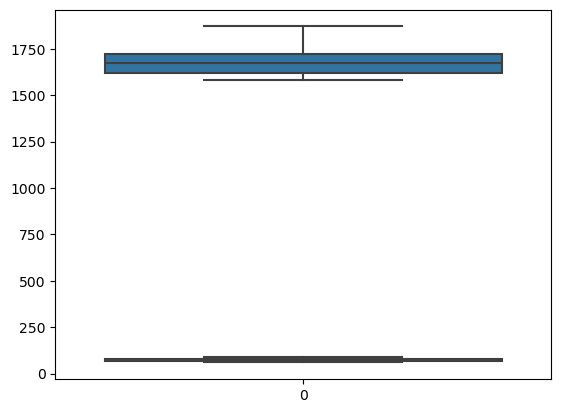

In [20]:
sns.boxplot(df['Churn_out_rate'])
sns.boxplot(df['Salary_hike'])

<Axes: >

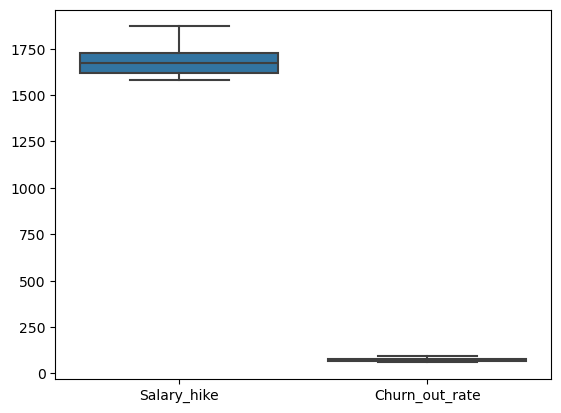

In [19]:
sns.boxplot(df)

#there are no outliers present here

4.Exploratory Data Analysis (EDA):
       4.1 Summary.
       4.2 Univariate analysis.
       4.3 Bivariate analysis.

In [21]:
df.describe()

,Salary_hike,Churn_out_rate
count,10.000000,10.000000
mean,1688.600000,72.900000
std,92.096809,10.257247
min,1580.000000,60.000000
25%,1617.500000,65.750000
50%,1675.000000,71.000000
75%,1724.000000,78.750000
max,1870.000000,92.000000


In [22]:
#Univariate Analysis

C:\Users\Vaishnavi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


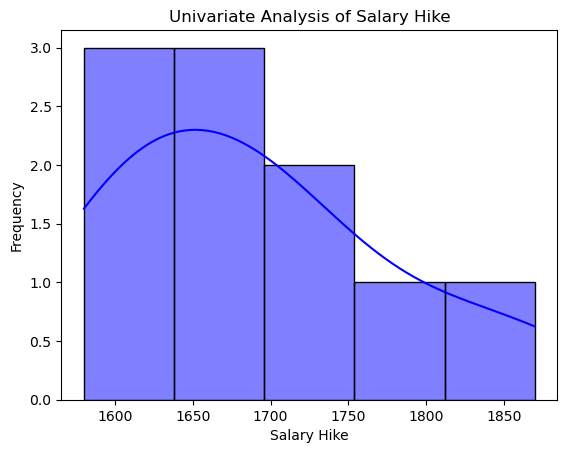

C:\Users\Vaishnavi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


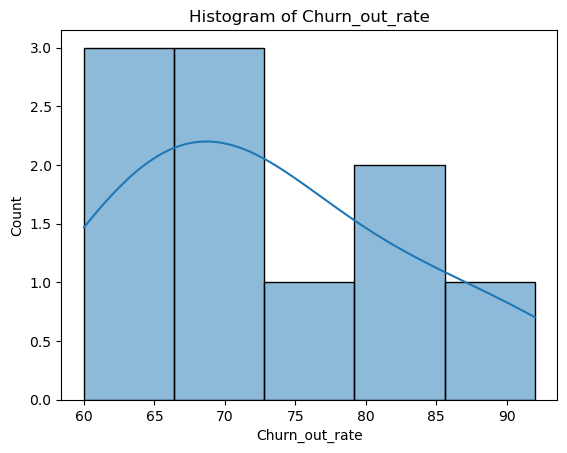

In [27]:
sns.histplot(df['Salary_hike'], kde=True, color='blue')
plt.title('Univariate Analysis of Salary Hike')
plt.xlabel('Salary Hike')
plt.ylabel('Frequency')
plt.show()

sns.histplot(df['Churn_out_rate'],kde=True)
plt.title('Histogram of Churn_out_rate')
plt.show()

C:\Users\Vaishnavi\AppData\Local\Temp\ipykernel_4840\2664262984.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Salary_hike'],kde=True)
C:\Users\Vaishnavi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Salary_hike', ylabel='Density'>

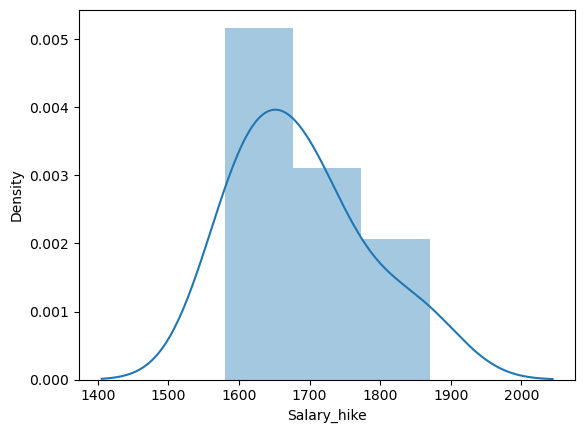

In [29]:
sns.distplot(df['Salary_hike'],kde=True)

C:\Users\Vaishnavi\AppData\Local\Temp\ipykernel_4840\3519688934.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Churn_out_rate'],kde=True)
C:\Users\Vaishnavi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Churn_out_rate', ylabel='Density'>

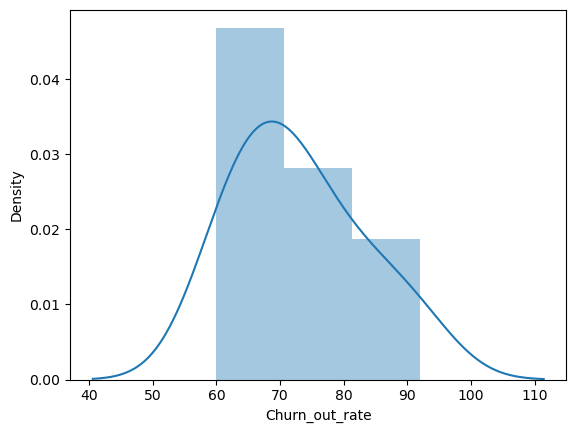

In [30]:
sns.distplot(df['Churn_out_rate'],kde=True)

# Bivariate Analysis

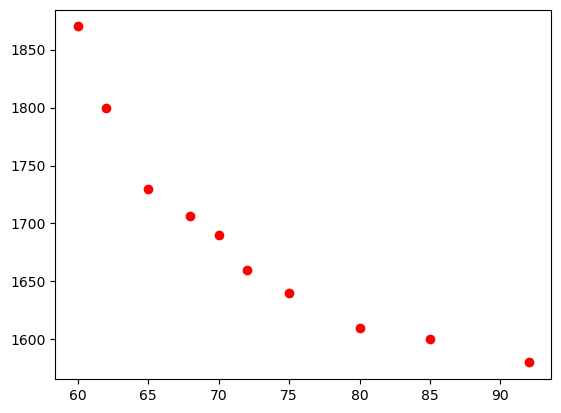

In [31]:
plt.scatter(x=df['Churn_out_rate'],y=df['Salary_hike'],color='red')

#here data is linear.as the values are if one increases the other decreases.It is in negative direction

In [32]:
df['Churn_out_rate'].cov(df['Salary_hike'])

-861.2666666666667

In [34]:
df.corr() #this tells that the features are strongly but negatively correlated to each other

,Salary_hike,Churn_out_rate
Salary_hike,1.000000,-0.911722
Churn_out_rate,-0.911722,1.000000


In [35]:
df.kurtosis()

Salary_hike       0.165793
Churn_out_rate   -0.328199
dtype: float64

In [36]:
df.skew()

Salary_hike       0.858375
Churn_out_rate    0.647237
dtype: float64

<Axes: >

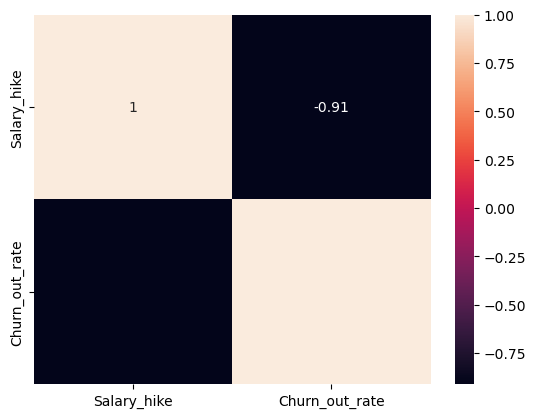

In [37]:
sns.heatmap(df.corr(),annot=True)

In [38]:
import statsmodels.formula.api as smf
df['x']=df['Churn_out_rate']
df['y']=df['Salary_hike']


In [39]:
model=smf.ols('y~x',data=df).fit()

In [40]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     39.40
Date:                Thu, 27 Feb 2025   Prob (F-statistic):           0.000239
Time:                        21:47:42   Log-Likelihood:                -49.995
No. Observations:                  10   AIC:                             104.0
Df Residuals:                       8   BIC:                             104.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2285.3653     95.912     23.828      0.0

C:\Users\Vaishnavi\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [46]:
pred1=model.predict(df['x'])

C:\Users\Vaishnavi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Vaishnavi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


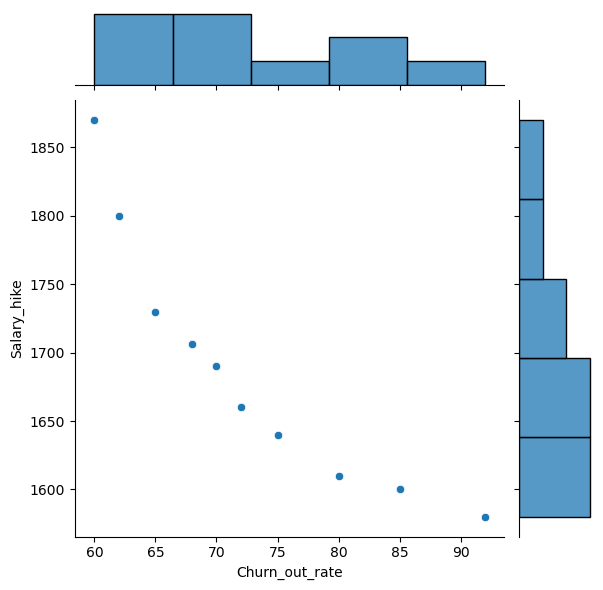

In [41]:
sns.jointplot(df,x='Churn_out_rate',y='Salary_hike')

C:\Users\Vaishnavi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Vaishnavi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Vaishnavi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Vaishnavi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

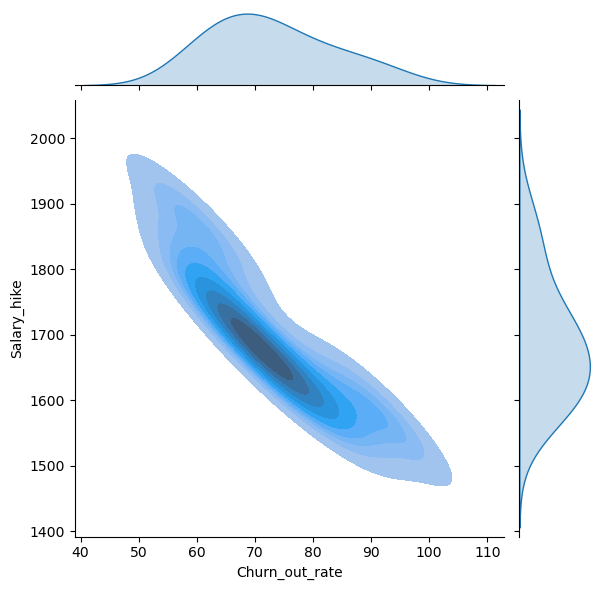

In [42]:
sns.jointplot(df,x='Churn_out_rate',y='Salary_hike',kind='kde',fill=True)

C:\Users\Vaishnavi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='x', ylabel='Density'>

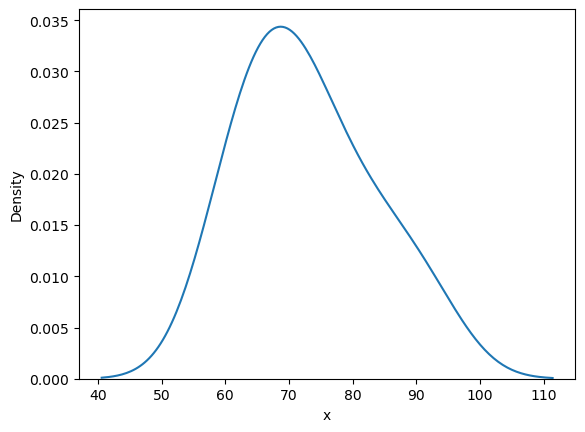

In [43]:
sns.kdeplot(df['x'])

In [47]:

from sklearn.metrics import r2_score 
r2_score(df['y'],pred1)

0.8312363099883753

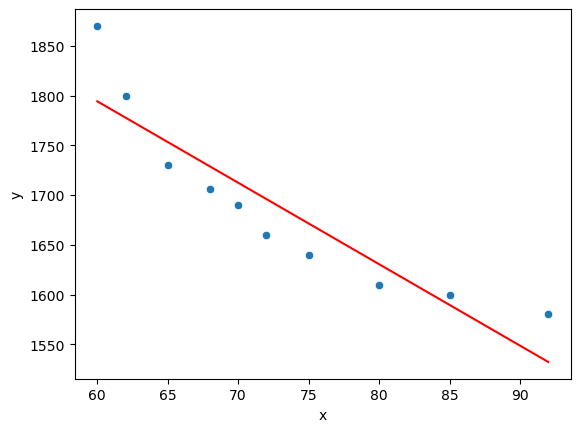

In [48]:
sns.scatterplot(df,x='x',y='y')
plt.plot(df['x'],pred1,color='red')

In [49]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(df[['x']],df[['y']])

LinearRegression()

In [50]:
y_pred=lr.predict(df[['x']])
r2_score(df.y,y_pred)

0.8312363099883755